# Naive Bayes

## Write your id numbers and names here


1.   Omer Rosenberg 315328898
2.   Chen Harel 205566292


## 1. Classifying Digits
In this part we will test digits classification on the MNIST dataset, using Bernoulli Naive Bayes (a generative model), in contrast to the Multivariate Logistic Regression (a discriminative model) we used before.

The MNIST dataset contains 28x28 grayscale images of handwritten digits between 0 and 9 (10 classes). For mathmatical analysis clarity, and for matching expected API, each image faltten to create a 1D array with 784 elements.

### Loading the MNIST dataset
Load the MNIST data set. The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. Use 
```
mnist = sklearn.datasets.fetch_mldata('MNIST original')
```
to fetch the original data. You may set the `data_home` to where you wish to download your data for caching. Each image is already transformed into a 1D integer array $x\in [0,255]^{784}$, and the corresponding label is an integer $y\in [0,9]$.

Plot a single sample of each digit as the original image, so you get a feeling how the data looks like.

Finally, divide your data into train and test sets, using 1/7 of the data for testing.

---
**Note 1:** Using `digits = sklearn.datasets.load_digits()` will only fetch a very small sample of the original set, with images resized to 8x8. This preprocessing of the data reduces dimensionality and gives invariance to small distortions - however, we will use the original data in this exercise. Feel free to test the proformance of the algorithms below on the preprocessed data as well.

**Note 2:**
Since ML-Data is deprecated, you may wish to use something like this:
>```
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
```

In [221]:
import sklearn
mnist = sklearn.datasets.fetch_mldata('MNIST original')

AttributeError: ignored

In [222]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

In [223]:
import matplotlib as plt 

In [224]:
sample = x_test[0].reshape(28,28)

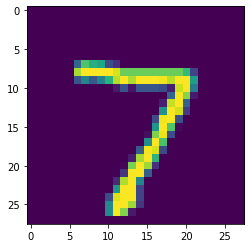

In [225]:
plt.pyplot.imshow(sample)

In [226]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### Bernoulli Naive Bayes
If we know how the digits are generated, then we know how to classify them (simply choose the digit class which will maximize the posterior probability) --- but which model should we use for describing the digits generation?

In this part we will try a very simplified model of digits creation (which is obviously not the same as the "real" model), using a Naive Bayes over an underlying Bernoulli distribution --- that is, we will assume that given a digit class, the pixels of the images are the result of independent coin flips, each with its own "head" probability.

Note that since we assume each pixl is either 0 (black) or 1 (white), we will need to adjust (preprocess) our data accrodingly (see below).

So, the model is stated as follows:
$$
\begin{align}
\text{Domain} && x \in \{0,1\}^{784} \\
\text{Prior} && \pi_j = \Pr(y=j) \\
\text{Likelihood} && P_j(x) = \Pr(x | y=j) \\
\end{align}
$$

Where for each $i\in 0\ldots 784$ it holds that
$$
P_{ji}(x_i) = \Pr(x_i | y=j) =
\begin{cases}
p_{ji} & \text{if } x_i=1 \\
1-p_{ji} & \text{if } x_i=0 \\
\end{cases}
$$


#### Question 1
Write the classification rule based on this Naive Bayes model. 
How would you esitmate each of the parameters of the model based on the trainning data? 
Describe in text (preferably math notationns) the classification rule, and explain.

**Bonus:** Think of edge cases which may effect your estimator in an undesired way.

#### Answer 1

estimation of $P(class = j)$(Prior): \\
$P(class = j) = \frac{\Sigma class = j}{size\  of\  training}$ \\
estimation of $P_{ji}(x_i=1|class=j)$(Likelihood): \\
for each class $j\in [0-9]$ and index $i\in [0-784]$ we will estimate the probability $P_{ji}(x_i=1|class=j)$ as the number of times $x_{i} = 1$ and the $class = j$ divided by the total samples of $class = j$.
$$
P_{ji}(x_i=1|class=j) = \frac {\Sigma (x_i=1 \cap class = j)}{\Sigma (class=j)}\\
P_{ji}(x_i=0|class = j)=1-P_{ji}(x_i=1|class = j)
$$

So for $x'=[x_0,x_1,...,x_{784}]$ and a class $j$#:\
$ P(j|x')=  Π P_{ji}(x'_{i}|j)P(class = j) $\
\
 our map rule is:\
$ Class(x') = argmax_j(( Π_{i=0}^n P_{ji}(x'_{i}|j)P(class = j)) = argmax_j(\Sigma_{i=0}^n log(P_{ji}(x'_{i}|j)+ log(P(class = j))) $ \
\
**Bonus** (Edge cases) - cases when $P_{ji}(x'_{i}|j) = 0$, it will force the estimator to give class j probabilty of 0 and chose another class.\
it can be fixed with smoothing as we saw in the lecture.

#### Question 2
Run a Naive Bayes classifier on the training data and apply predictions on the test data. Use the [sklearn.naive_bayes.BernoulliNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html) implementation (see the [source code for sklearn.naive_bayes](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/naive_bayes.py) for details).

Remember we need to preprocess the data in this case such that each pixel would become either black (0) or white (1). For this, use the `binarize` parameter of the implementation. Set this value to $0$ (this is the default), which in this case would mean every pixel with non-zero value will be set to 1.

1. Plot the mean image of each class (estimated $\hat{p}_{ji}$) and generate one sample of each class (remember, you can do this since this is a generative model). You will need to access the `feature_log_prob_` attribute of the trained model.

2. Plot the confusion matrix of your classifier, as claculated on the test data (it is recommended to use [sklearn.metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)). Calculate the total accuracy (fraction of correctly classified images), and summarize the results in your own words.

3. Think of a way you can find the optimal threshold of the binarization part. **There is no need to actually perform this task --- just describe what you would have done.**


#### Answer 2
Put you answer here...

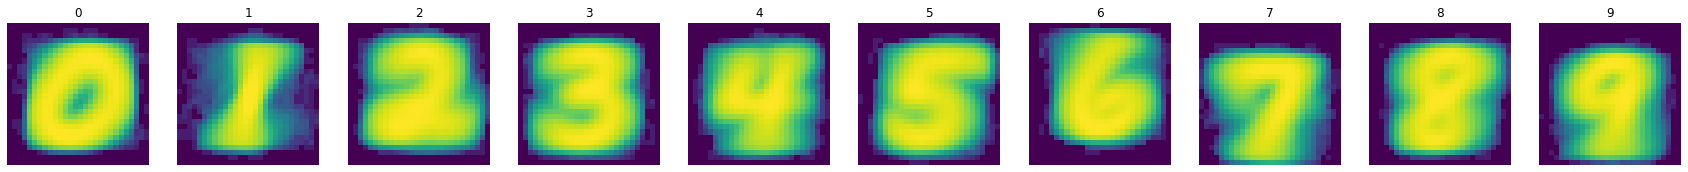

In [227]:
##### 2.1 - estimated Pij
from sklearn.naive_bayes import BernoulliNB
import matplotlib as plt 
model = BernoulliNB()
model.fit(x_train, y_train)
log_prob = model.feature_log_prob_
fig, axs = plt.pyplot.subplots(1,10, figsize=(30, 4))
for i in range(0,10):
  axs[i].imshow(log_prob[i].reshape(28,28))
  axs[i].set_title(str(i))
  axs[i].set_axis_off()


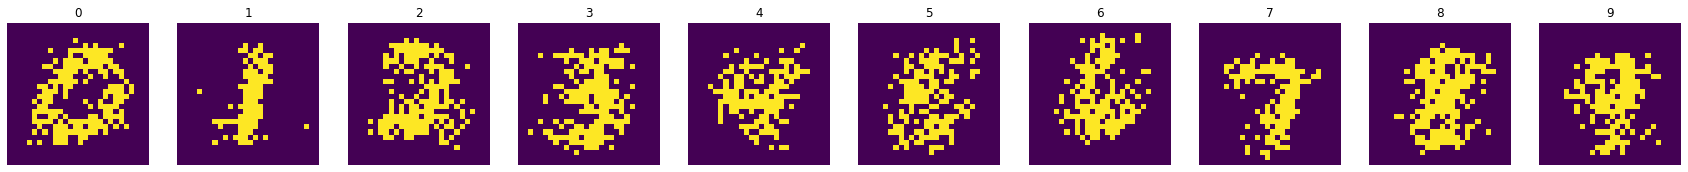

In [228]:
##### 2.1 - generated samples of each class
import numpy as np
probs = np.exp(log_prob)
samples = (np.random.rand(*probs.shape) < probs).astype(int)
fig, axs = plt.pyplot.subplots(1,10, figsize=(30, 4))
for i in range(0,10):
  axs[i].imshow(samples[i].reshape(28,28))
  axs[i].set_title(str(i))
  axs[i].set_axis_off()


In [229]:
##### 2.2 Confusion matrix and accuracy
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred, labels= range(0,10))
good_predictions = 0
for i in range(0, 10):
  good_predictions += conf_matrix[i][i]
total_accurecy = good_predictions / len(x_test)
print("The total accurecy of the model is: " + str(total_accurecy))
conf_matrix

The total accurecy of the model is: 0.8413


array([[ 887,    0,    4,    7,    2,   41,   16,    1,   22,    0],
       [   0, 1085,   10,    5,    0,    9,    6,    0,   19,    1],
       [  19,    8,  852,   29,   17,    4,   32,   14,   55,    2],
       [   5,   15,   34,  844,    0,   13,    9,   15,   49,   26],
       [   2,    6,    4,    0,  795,    4,   21,    1,   23,  126],
       [  23,   12,    7,  129,   30,  627,   16,    8,   21,   19],
       [  18,   18,   15,    2,   13,   35,  851,    0,    6,    0],
       [   1,   24,   14,    4,   15,    0,    0,  871,   27,   72],
       [  16,   23,   13,   76,   17,   22,    7,    6,  758,   36],
       [   9,   13,    5,    9,   74,    8,    0,   24,   24,  843]])

\##### **2.2 - Results Summary** \
after plotting and evaluating the model's accurecy we can see that he classifies\
the data quite good: \
Firstly, we can see from the plots of the estimated $\hat{p}$ the classes are quite understandble. \
Secondly, the accurecy of the model is high, it classifies right in 84.13% of the cases. \
this indicates the model isnt overfitted.


\##### **2.3 - Optimal Binarization Factor** 
\
The binarize is the threshold that dictates which values mapped to 1 and which to 0. \
As higher the binarize factor we give to the model more values will be mapped to 1. \
in order to find the optimal threshold we would iterate over the 255 possible binarization factors and chose the one that provides the best results. \
in order to improve it we would divide our data to k pieces and do this procces with k cross validation(train on k-1 pieces and test on one pieace k times) and get for each fold its local optimal binarization factor.\
then the global optimal binarization factor will be the mean of the k local optimal binarization factors.


## 2. Classifing Text Documents using Multinomial Naive Bayes
In this exercise you will classify the "20 newsgroups" data set using your own naive bayes classifier and compare to the scikit learn built in version.

The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon messages posted before and after a specific date.

### You task
Implement the barebone class provided: `NaiveBayes(BaseEstimator, ClassifierMixin)` and implement its `fit`, `predict` and `predict_proba` methods.

Then follow next anlysis guidlinnes using the implemented class for train and test classifier:
* Load the **train** data using `from sklearn.datasets import fetch_20newsgroups`. remove headers, footers and quotes (see documentation)
* Use `sklearn.feature_extraction.text import CountVectorizer` to count words (stop_words='english')
* use `sklearn.pipeline.make_pipeline` to chain the vectroizer and model.
* note: limit the vocuabolary size if you suffer memory issues
* compare the accuracy over the **test** data. You can use `accuracy_score, classification_report`
* compare to the built in `sklearn.naive_bayes.MultinomialNB`
* compare to `TfidfVectorizer` preprocessing (you can use the built in model for doing the analysis)
* plot the learning curve - is the model in the bias or variance regime (you can use the built in model for doing the analysis)
* optimize performance in respect to vectorizer hyper parameters (e.g. max_features, max_df etc.).


In [230]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from scipy.sparse import csr_matrix as csr
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_learning_curves
from sklearn.model_selection import learning_curve

In [231]:
class NaiveBayes(BaseEstimator, ClassifierMixin):

#BaseEstimator and ClassifierMixin are imported from sklearn.base
  def __init__(self):
    self.prior = np.ndarray
    self.likelihood = np.ndarray
    self.sample_label_prob = np.ndarray

  def fit(self, x, y):
    labels = np.unique(y)
    #Lengts 
    n_docs = x.shape[0]
    n_terms = x.shape[1]
    n_labels = labels.shape[0]
    
    #Prior
    prior = np.zeros(shape = (1,n_labels))
    for label in y:
      prior[0][label] += 1
    prior = prior/n_docs
    self.prior = prior

    #Likelihood
    #likelihood is term frequency here, we manipulated the calculation in order to save likelihood as a sparse matrix, the probability calculation is in the predict log proba
    nz_row, nz_cols = x.nonzero()
    x_data = x.data
    n_values = x_data.shape[0]
    row = []
    col = []
    l_data = []
    for i in range(n_values):
      row.append(y[nz_row[i]])
      col.append(nz_cols[i])
      l_data.append(x_data[i])
    likelihood = csr_matrix((l_data, (row, col)), shape = (n_labels, n_terms))
    self.likelihood = likelihood
  
  def predict_log_proba(self, x):
    n_samples = x.shape[0]
    #number of words in a class - for the deminator
    n_terms_class = csr.sum(self.likelihood, axis = 1)
    #vocabulary size for smoothing 
    vocabulary_size = sum(self.likelihood.data)
    #number of indexes with values for each sample - for the deminator
    unique_terms_sample = np.zeros(shape = (1,n_samples))
    for i in range(n_samples):
      unique_terms_sample[0][i] = x.getrow(i).count_nonzero()
    #sample_label_prob is the matrix that will hold in the end for each sample the probability for each class
    #smoothing: +1 in the numerator, +|V| +words per class  for the deminator
    sample_label_prob = x.dot(np.log1p(csr.transpose(self.likelihood))) + np.log(self.prior)
    log_deminator = np.log(n_terms_class + vocabulary_size).dot(unique_terms_sample)
    sample_label_prob = sample_label_prob - np.transpose(log_deminator)
    self.sample_label_prob = sample_label_prob

  def predict(self, x):
    #argmax for the most likely class
    self.predict_log_proba(x)
    return np.argmax(self.sample_label_prob, axis = 1)
    

In [232]:
# Loading the data and defining the vectorizer
training_dict = fetch_20newsgroups(subset = 'train', remove = ('headers', 'footers', 'quotes'))
testing_dict = fetch_20newsgroups(subset = 'test', remove = ('headers', 'footers', 'quotes'))
training_data = training_dict['data']
testing_data = testing_dict['data']
training_labels = training_dict['target']
testing_labels = testing_dict['target']
vectorizer = CountVectorizer(stop_words = 'english')

In [233]:
# Our Model
our_model = NaiveBayes()
pipe_ours = Pipeline([('vec', vectorizer),
                 ('nb', our_model)])
pipe_ours.fit(training_data, training_labels)
predictions_ours = pipe_ours.predict(testing_data)
accuracy_score(testing_labels, predictions_ours)


0.5704992033988316

In [234]:
# Our Classification report
print(classification_report(testing_labels, predictions_ours))

              precision    recall  f1-score   support

           0       0.68      0.13      0.22       319
           1       0.66      0.58      0.62       389
           2       0.67      0.11      0.20       394
           3       0.57      0.62      0.59       392
           4       0.85      0.42      0.56       385
           5       0.46      0.85      0.59       395
           6       0.87      0.63      0.73       390
           7       0.88      0.54      0.67       396
           8       0.94      0.45      0.61       398
           9       0.98      0.58      0.73       397
          10       0.55      0.90      0.68       399
          11       0.37      0.82      0.51       396
          12       0.72      0.32      0.44       393
          13       0.81      0.74      0.77       396
          14       0.65      0.75      0.70       394
          15       0.44      0.88      0.58       398
          16       0.60      0.50      0.55       364
          17       0.36    

In [235]:
# sklearn's Model
sklearn = MultinomialNB()
pipe_sk = Pipeline([('vec', vectorizer),
                 ('nb', sklearn)])
pipe_sk.fit(training_data, training_labels)
predictions_sk = pipe_sk.predict(testing_data)
accuracy_score(testing_labels, predictions_sk)


0.6343600637280935

In [236]:
# sklearn's Classification report
print(classification_report(testing_labels, predictions_sk))

              precision    recall  f1-score   support

           0       0.65      0.30      0.41       319
           1       0.58      0.69      0.63       389
           2       0.40      0.01      0.01       394
           3       0.53      0.72      0.61       392
           4       0.74      0.56      0.64       385
           5       0.56      0.81      0.66       395
           6       0.85      0.69      0.76       390
           7       0.82      0.70      0.76       396
           8       0.91      0.62      0.73       398
           9       0.94      0.74      0.83       397
          10       0.58      0.91      0.71       399
          11       0.54      0.79      0.64       396
          12       0.71      0.49      0.58       393
          13       0.81      0.79      0.80       396
          14       0.72      0.75      0.73       394
          15       0.46      0.91      0.61       398
          16       0.57      0.61      0.59       364
          17       0.58    

In [237]:
# sklearn's Model with TF-IDF vectorizer
sklearn_tf = MultinomialNB()
vectorizer_tfidf = TfidfVectorizer(stop_words= 'english')
pipe_sk_tf = Pipeline([('vec', vectorizer_tfidf),
                 ('nb', sklearn_tf)])
pipe_sk_tf.fit(training_data, training_labels)
predictions_sk_tf = pipe_sk_tf.predict(testing_data)
accuracy_score(testing_labels, predictions_sk_tf)

0.6779075942644716

In [238]:
# sklearn's Classification report with TF-IDF vectorizer
print(classification_report(testing_labels, predictions_sk_tf))

              precision    recall  f1-score   support

           0       0.76      0.18      0.28       319
           1       0.67      0.69      0.68       389
           2       0.66      0.58      0.62       394
           3       0.60      0.74      0.66       392
           4       0.77      0.67      0.71       385
           5       0.81      0.77      0.79       395
           6       0.78      0.76      0.77       390
           7       0.84      0.73      0.78       396
           8       0.87      0.74      0.80       398
           9       0.92      0.80      0.85       397
          10       0.57      0.93      0.71       399
          11       0.59      0.79      0.67       396
          12       0.72      0.52      0.60       393
          13       0.89      0.76      0.82       396
          14       0.77      0.74      0.76       394
          15       0.37      0.93      0.53       398
          16       0.57      0.71      0.63       364
          17       0.81    

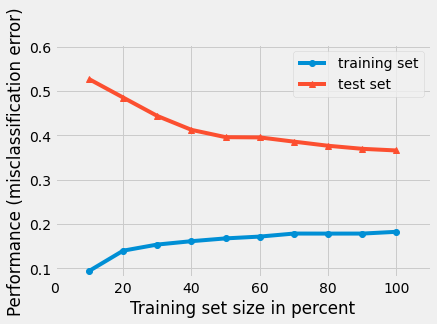

In [239]:
# Learning curve plot - sklearn's model
plot_learning_curves(np.asarray(training_data), training_labels, np.asarray(testing_data), testing_labels, pipe_sk, print_model= False)
plt.show()

**Learning Curve Analysis** \
from the learning curve we can see that the model is low bias and high variance regime.\
we can see that theres a big gap between the misclassification error rates between the training and test set which indicates on high variance




### Bonus I (5 points)
#### Model interpretability
Find the most important features for a **specific** decision of a NB classifier.
Because the model has learned the prior $p(x_i|c)$ during the training, the contribution of an individual feature value can be easily measured by the posterior, $p(c|x_i)=p(c)p(x_i|c)/p(x_i)$
Implement a function which gets a scikit-learn NB model as input and returns $P(c|x_i)$:

`def calc_p_c_given_xi(model)`

Hint: Use the following model properties:

* `model.class_log_prior_`
* `model.feature_log_prob_`

Note: remember these are logs and you need to use np.exp and normalize to get $P(c|x_i)$ 
Another hint: use numpy built-in broadcasting property.

* Use the interpretation to examine errors of the classifier where $\hat{c}\ne c$. Which top words support the correct class and which support the wrong class? You can use the `print_txt` below to color words.

In [240]:
import string
def print_txt(txt, hot, cold):
  """
  print the text, coloring hot and cold words with colors
  """
  cold_color='\x1b[41;37m{}\x1b[0m'
  hot_color='\x1b[42;37m{}\x1b[0m'
  def color(token):
    lower = str(token).lower()
    lower = lower.replace('\t','').replace('\n','')
    lower = lower.translate(string.punctuation)
    if (lower in hot) and (lower in cold):
      return mid_color.format(token)
    elif lower in hot:
      return hot_color.format(token)
    elif lower in cold:
      return cold_color.format(token)
    else:
      return token
  colored_txt = " ".join([color(token) for token in txt.split(' ')])
  print(colored_txt)
print_txt('This word support the first class but this the other', ['word'],['other'])

This word support the first class but this the other


In [241]:
# Implementationn for 1st bonus

### Bonus II (5 points)
#### How can you correct the analyzed error?

To read more about model interpretation, see the blogpost below and the tutorial:
* https://lilianweng.github.io/lil-log/2017/08/01/how-to-explain-the-prediction-of-a-machine-learning-model.html
* https://github.com/chanansh/right_but_why

Answer for 2nd bonus